# Logistic regression

This notebook shows the functionality of the LogisticRegression class in models/logistic_regression.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys

sys.path.append("..")
from models.logistic_regression import LogisticRegression
from utils.datasets import blobs_classification_dataset
from utils.visualization import plot_decision_boundary

In [2]:
%matplotlib inline

# Turn interactive plotting off
plt.ioff()

Despite its name, the logistic regression is a classification algorithm. It owes the name to its similarity with linear regression. The model maps a linear combination of the input features to a probablity using the standard logistic function or the sigmoid function:

$$
\hat{y} = \frac{1}{1+e^{- XW}}
$$

It performs binary classfication, although it can be extended to multinomial classification, using the one-vs-all approach for instance.

## Classification on a toy dataset

The dataset consists on a set of $n$ 2-dimensional points, $X = {x}_n$, and a label for each point $y_i \in \{0, 1\}$. As the algorithm outputs a probability based on a linear combination of the input features, the model will only perform well if the data is lineary separable.

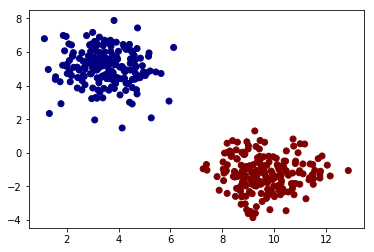

In [3]:
# Load the data.
(x_train, y_train), (x_test, y_test) = blobs_classification_dataset(features=2, classes=2, samples=500)

plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap='jet')
plt.show()

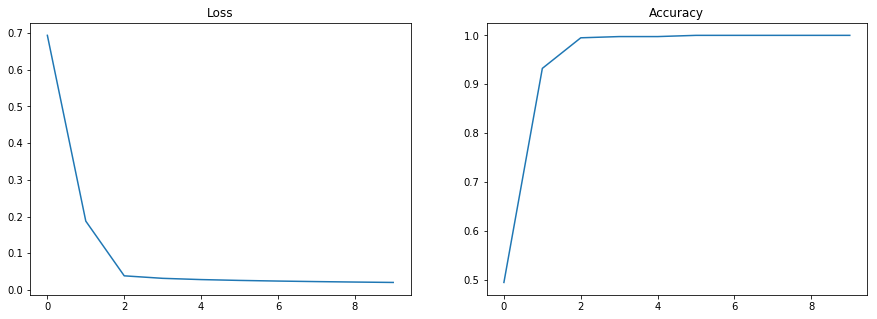

In [4]:
# Initialize and fit the model.
model = LogisticRegression(n_features=2)
loss, acc = model.fit(x_train, y_train, iterations=10, learning_rate=1e-3)

# Visualize training.
f, (ax1, ax2) = plt.subplots(1, 2, figsize=[15, 5])

ax1.plot(loss)
ax1.set_title('Loss')

ax2.plot(acc)
ax2.set_title('Accuracy')

plt.show()

## Assesing the model on the test set

The goal of training the model is to generate accurate predictions on new data, achieving good metrics on the training set can be due to overfitting or memorizing the training set. We need to asses the model on a holdout set.

Performance on the test set:

	Loss=0.018147947768917212
	Accuracy=1.0


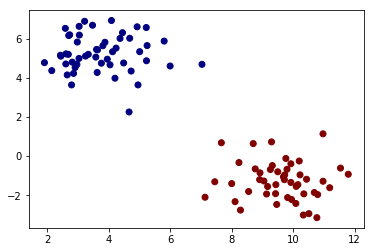

In [5]:
# Compute performance metrics on the test set
y_hat = model.predict(x_test)
loss = model.loss(y_test, y_hat)
acc = np.mean(np.around(y_hat)==y_test)

print("Performance on the test set:\n\n\tLoss={}\n\tAccuracy={}".format(loss, acc))

# Visualize new predictions
plt.scatter(x_test[:, 0], x_test[:, 1], c=np.around(y_hat), cmap='jet')
plt.show()

### Visualize decision boundary

As stated before, this algorithm only generalizes well when the data is lineary separable. We can visually check that its decision boundary is a straight line. 

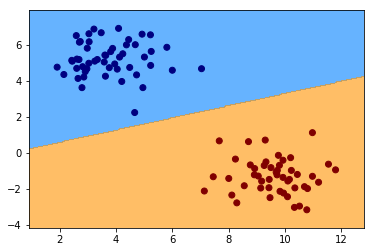

In [6]:
ax = plot_decision_boundary(model.predict,
                            x_range=[x_test[:, 0].min()-1, x_test[:, 0].max()+1],
                            y_range=[x_test[:, 1].min()-1, x_test[:, 1].max()+1])
ax.scatter(x_test[:, 0], x_test[:, 1], c=y_test, cmap='jet', label='True classes')
plt.show()

Moreover we can try to fit non-linery separable data and verify that the decision boundary remains a straight line, not being able to generalize well

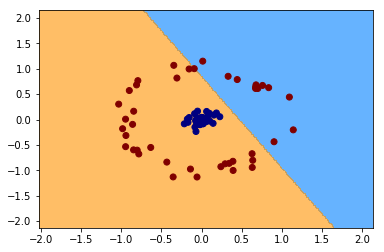

In [7]:
# Load new data
from utils.datasets import radial_classification_dataset
(x_train, y_train), (x_test, y_test) = radial_classification_dataset()

# Fit the model
loss, acc = model.fit(x_train, y_train, iterations=1000, learning_rate=1e-2)

# Visualize decision boundary
ax = plot_decision_boundary(model.predict,
                            x_range=[x_train[:, 0].min()-1, x_train[:, 0].max()+1],
                            y_range=[x_train[:, 1].min()-1, x_train[:, 1].max()+1])
ax.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap='jet', label='True classes')
plt.show()

We can see that the model has converged but the the algorithm is too simple to model the real distribution of the data. The model has high bias.

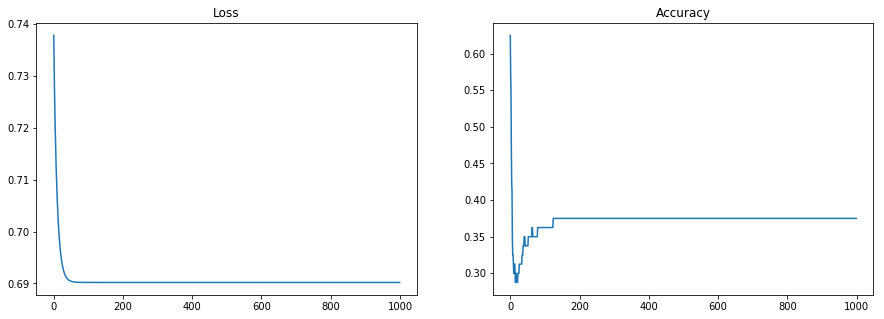

In [8]:
# Visualize training.
f, (ax1, ax2) = plt.subplots(1, 2, figsize=[15, 5])

ax1.plot(loss)
ax1.set_title('Loss')

ax2.plot(acc)
ax2.set_title('Accuracy')

plt.show()